**Nama : Dika Kencana Putera**

**Kelompok : Deep Learning 4.0**

# DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from dython.nominal import associations
import featurewiz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

Imported version = 0.1.44.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
df = pd.read_csv("E:/DIKA's/DATA PRODUKTIF DIKA\DATA SCIENCE/Rakamin/Dataset/in-vehicle-coupon-recommendation.csv")

In [3]:
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

In [4]:
df = df.fillna(df.mode().iloc[0])

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(12610, 23)

In [7]:
df_dummy = df.copy()

In [8]:
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df_dummy['age'] = age_list

In [9]:
df_dummy['passanger_destination'] = df_dummy['passanger'].astype(str) + '-' + df_dummy['destination'].astype(str)
df_dummy['marital_hasChildren'] = df_dummy['maritalStatus'].astype(str) + '-' + df_dummy['has_children'].astype(str)
df_dummy['temperature_weather'] = df_dummy['temperature'].astype(str) + '-' + df_dummy['weather'].astype(str)

In [10]:
df_dummy = df_dummy.drop(columns=['passanger', 'destination', 'maritalStatus', 'has_children', 'temperature','weather', 'Y'])

In [11]:
df_dummy = pd.concat([df_dummy, df['Y']], axis = 1)

In [12]:
pd.set_option('display.max_rows', None)
df_dummy.head()

,time,coupon,expiration,gender,age,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,passanger_destination,marital_hasChildren,temperature_weather,Y
0,2PM,Restaurant(<20),1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,Alone-No Urgent Place,Unmarried partner-1,55-Sunny,1
1,10AM,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0
2,10AM,Carry out & Take away,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,1
3,2PM,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0
4,2PM,Coffee House,1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0


In [13]:
df_dummy.shape

(12610, 20)

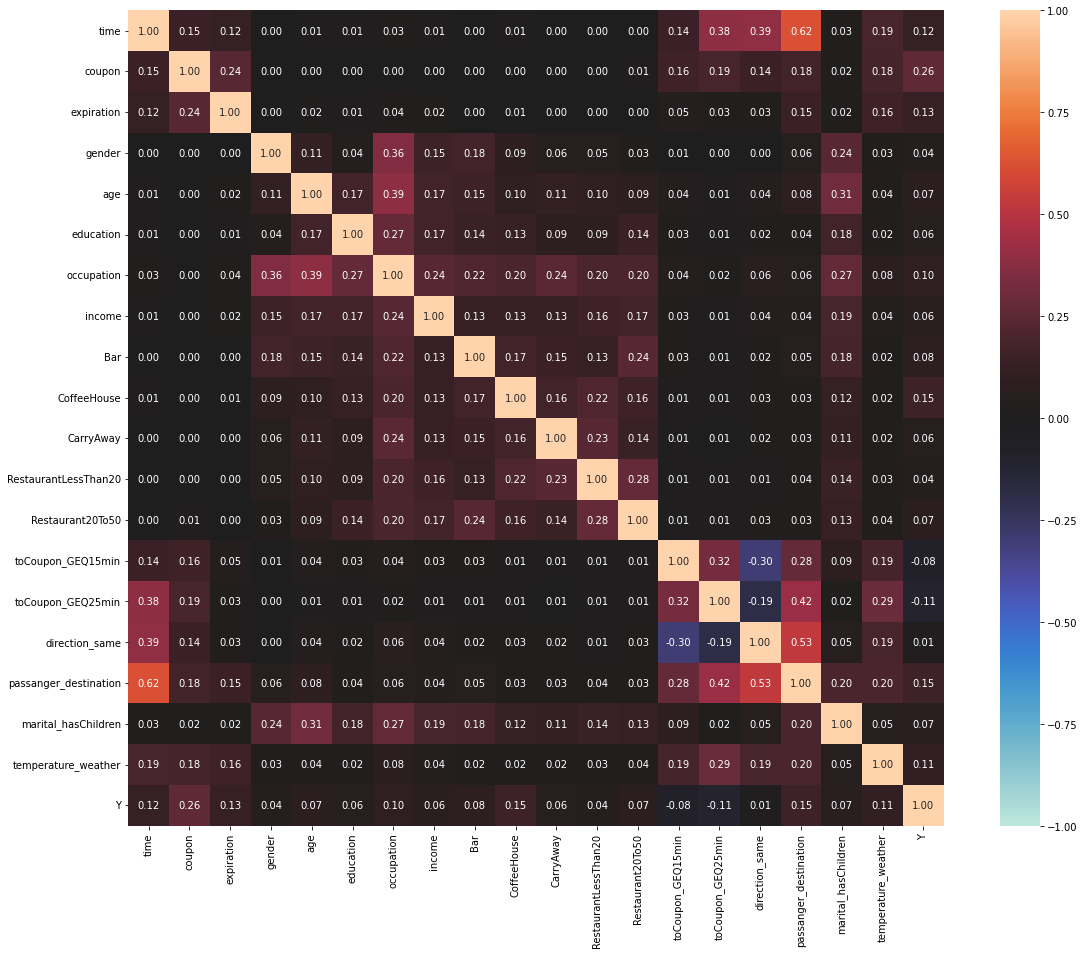

{'corr':                            time    coupon  expiration    gender       age  \
 time                   1.000000  0.145076    0.122493  0.000000  0.013941   
 coupon                 0.145076  1.000000    0.236730  0.000000  0.000000   
 expiration             0.122493  0.236730    1.000000  0.000000  0.021654   
 gender                 0.000000  0.000000    0.000000  1.000000  0.114030   
 age                    0.013941  0.000000    0.021654  0.114030  1.000000   
 education              0.011139  0.000000    0.008719  0.040181  0.169781   
 occupation             0.029085  0.000000    0.037034  0.355103  0.387739   
 income                 0.011982  0.000000    0.020355  0.151196  0.165255   
 Bar                    0.000000  0.000000    0.000000  0.175968  0.150146   
 CoffeeHouse            0.012379  0.000000    0.007679  0.092495  0.098032   
 CarryAway              0.000000  0.000000    0.000000  0.056911  0.113623   
 RestaurantLessThan20   0.002411  0.000000    0.000938  

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
associations(df_dummy, nom_nom_assoc='cramer', ax=ax)

In [15]:
df_dummy = df_dummy.drop(columns=['gender', 'RestaurantLessThan20'])

In [16]:
df_dummy.columns

Index(['time', 'coupon', 'expiration', 'age', 'education', 'occupation',
       'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'passanger_destination', 'marital_hasChildren', 'temperature_weather',
       'Y'],
      dtype='object')

In [17]:
df_dummy[['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather']].nunique()

passanger_destination     8
marital_hasChildren      10
occupation               25
coupon                    5
temperature_weather       5
dtype: int64

In [18]:
df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'income':{'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5, '$75000 - $87499':6, '$87500 - $99999':7, '$100000 or More':8},
                    'time':{'7AM':0, '10AM':1, '2PM':2, '6PM':3, '10PM':4}})

In [19]:
df_le.head()

,time,coupon,expiration,age,education,occupation,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,passanger_destination,marital_hasChildren,temperature_weather,Y
0,2,Restaurant(<20),1,1,2,Unemployed,3,0,0,2,2,0,0,0,Alone-No Urgent Place,Unmarried partner-1,55-Sunny,1
1,1,Coffee House,0,1,2,Unemployed,3,0,0,2,2,0,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0
2,1,Carry out & Take away,0,1,2,Unemployed,3,0,0,2,2,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,1
3,2,Coffee House,0,1,2,Unemployed,3,0,0,2,2,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0
4,2,Coffee House,1,1,2,Unemployed,3,0,0,2,2,1,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny,0


In [20]:
x = df_le.drop('Y', axis=1)
y = df_le.Y

# LEARNING CURVE N_COMPONENTS

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8827, 17)
(3783, 17)
(8827,)
(3783,)


In [32]:
from category_encoders import HashingEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
def get_score(model, x, y, x_test, y_test):
    model.fit(x, y)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    return score

logit = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [24]:
n_components_list = [3, 5, 7, 8, 10, 12, 15, 17, 19, 20, 22, 24, 25, 27, 28, 29, 30]
n_components_list_str = [str(i) for i in n_components_list]

In [25]:
fh_logit_scores = []

# Iterate over different n_components:
for n_components in n_components_list:
    
    hashing_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=n_components).fit(x_train, y_train)
    
    x_train_hashing = hashing_enc.transform(x_train.reset_index(drop=True))
    x_test_hashing = hashing_enc.transform(x_test.reset_index(drop=True))
    
    fe_logit_score = get_score(logit, x_train_hashing, y_train, x_test_hashing, y_test)
    fh_logit_scores.append(fe_logit_score)

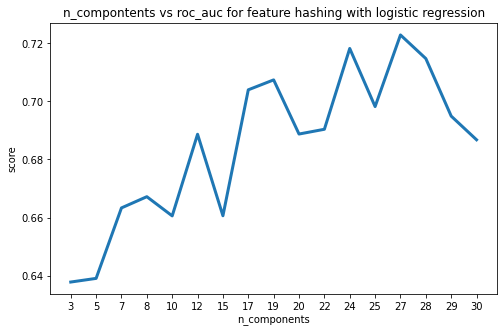

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(n_components_list_str, fh_logit_scores, linewidth=3)
plt.title('n_compontents vs roc_auc for feature hashing with logistic regression')
plt.xlabel('n_components')
plt.ylabel('score')
plt.show;

In [29]:
hashing_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=27).fit(x_train, y_train)
x_train_hashing = hashing_enc.transform(x_train.reset_index(drop=True))
x_test_hashing = hashing_enc.transform(x_test.reset_index(drop=True))

In [36]:
hashing_logit_score = get_score(logit, x_train_hashing, y_train, x_test_hashing, y_test)
print('Logistic Regression score with feature hashing:', hashing_logit_score)

Logistic Regression score with feature hashing: 0.7228089894660197


# DATA SPLITTING

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
hashing_ros_enc = HashingEncoder(cols=['passanger_destination', 'marital_hasChildren', 'occupation', 'coupon', 'temperature_weather'], n_components=27).fit(x_train, y_train)
x_train_hashing = hashing_ros_enc.transform(x_train.reset_index(drop=True))
x_test_hashing = hashing_ros_enc.transform(x_test.reset_index(drop=True))

In [40]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=42)
x_sm_train_hashing, y_sm_train = sm.fit_resample(x_train_hashing, y_train)

In [52]:
print(x_sm_train_hashing.shape)
print(x_test_hashing.shape)
print(y_sm_train.shape)
print(y_test.shape)

(10056, 39)
(3783, 39)
(10056,)
(3783,)


In [53]:
y_sm_ri = y_sm_train.reset_index()
y_sm_ri.head()

,index,Y
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


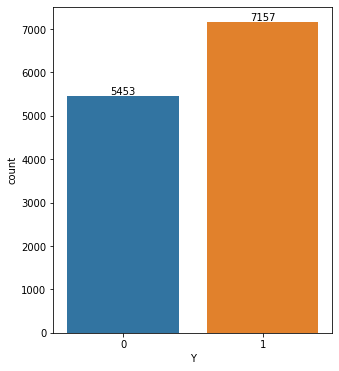

In [54]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.countplot(df_le['Y'])
plt.bar_label(ax.containers[0]);

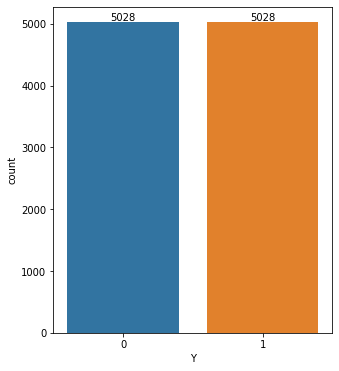

In [55]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.countplot(y_sm_ri['Y'])
plt.bar_label(ax.containers[0]);

In [56]:
hashing_sm_logit_score = get_score(logit, x_sm_train_hashing, y_sm_train, x_test_hashing, y_test)
print('SMOTE Logistic Regression score with feature hashing:', hashing_sm_logit_score)

SMOTE Logistic Regression score with feature hashing: 0.7224258994946847


In [57]:
pd.set_option('display.max_columns', None)
x_sm_train_hashing.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,time,expiration,age,education,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,3,0,1,4,6,0,0,2,2,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3,0,1,2,2,0,1,2,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,3,0,2,2,8,1,1,4,2,1,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,2,3,7,0,3,3,1,1,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2,2,2,0,4,3,1,1,0,1


# MODEL TESTING

In [58]:
def eval(model):
    y_pred = model.predict(x_test_hashing)
    y_pred_proba = model.predict_proba(x_test_hashing)
    y_pred_train = model.predict(x_sm_train_hashing)
    y_pred_train_proba = model.predict_proba(x_sm_train_hashing)

    print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
    print('precision (test): '+ str(precision_score(y_test, y_pred)))
    print('recall (test): '+ str(recall_score(y_test, y_pred)))
    print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
    print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))

**Logistic Regression**

In [61]:
logit = LogisticRegression(random_state=42, class_weight='balanced')
logit.fit(x_sm_train_hashing, y_sm_train)
eval(logit)

accuracy (test): 0.6687813904308749
precision (test): 0.6892826274848747
recall (test): 0.7491780178487553
roc-auc (train-proba): 0.7826749755862002
roc-auc (test-proba): 0.7224258994946847


**Random Forest**

In [109]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(x_sm_train_hashing, y_sm_train)
eval(rf)

accuracy (test): 0.7430610626486915
precision (test): 0.7642759250799451
recall (test): 0.7858149365899484
roc-auc (train-proba): 0.9999972310985292
roc-auc (test-proba): 0.8096007344876959


[Text(0.5842568649948785, 0.9852941176470589, 'col_20 <= 0.5\ngini = 0.5\nsamples = 6359\nvalue = [5018, 5038]'),
 Text(0.3108335347761622, 0.9558823529411765, 'col_16 <= 0.5\ngini = 0.49\nsamples = 3406\nvalue = [2402, 2997]'),
 Text(0.12661841831555237, 0.9264705882352942, 'CoffeeHouse <= 0.5\ngini = 0.48\nsamples = 2722\nvalue = [1797, 2561]'),
 Text(0.05289472829968188, 0.8970588235294118, 'col_4 <= 0.5\ngini = 0.5\nsamples = 663\nvalue = [560, 496]'),
 Text(0.024190092839057327, 0.8676470588235294, 'CarryAway <= 1.5\ngini = 0.46\nsamples = 470\nvalue = [483, 272]'),
 Text(0.011147179120950465, 0.8382352941176471, 'toCoupon_GEQ15min <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [109, 92]'),
 Text(0.006907745244432903, 0.8088235294117647, 'income <= 7.5\ngini = 0.43\nsamples = 60\nvalue = [70, 31]'),
 Text(0.0055054210218788546, 0.7794117647058824, 'col_25 <= 0.5\ngini = 0.4\nsamples = 54\nvalue = [64, 25]'),
 Text(0.003947282996818802, 0.75, 'col_18 <= 0.5\ngini = 0.48\nsamples = 34\n

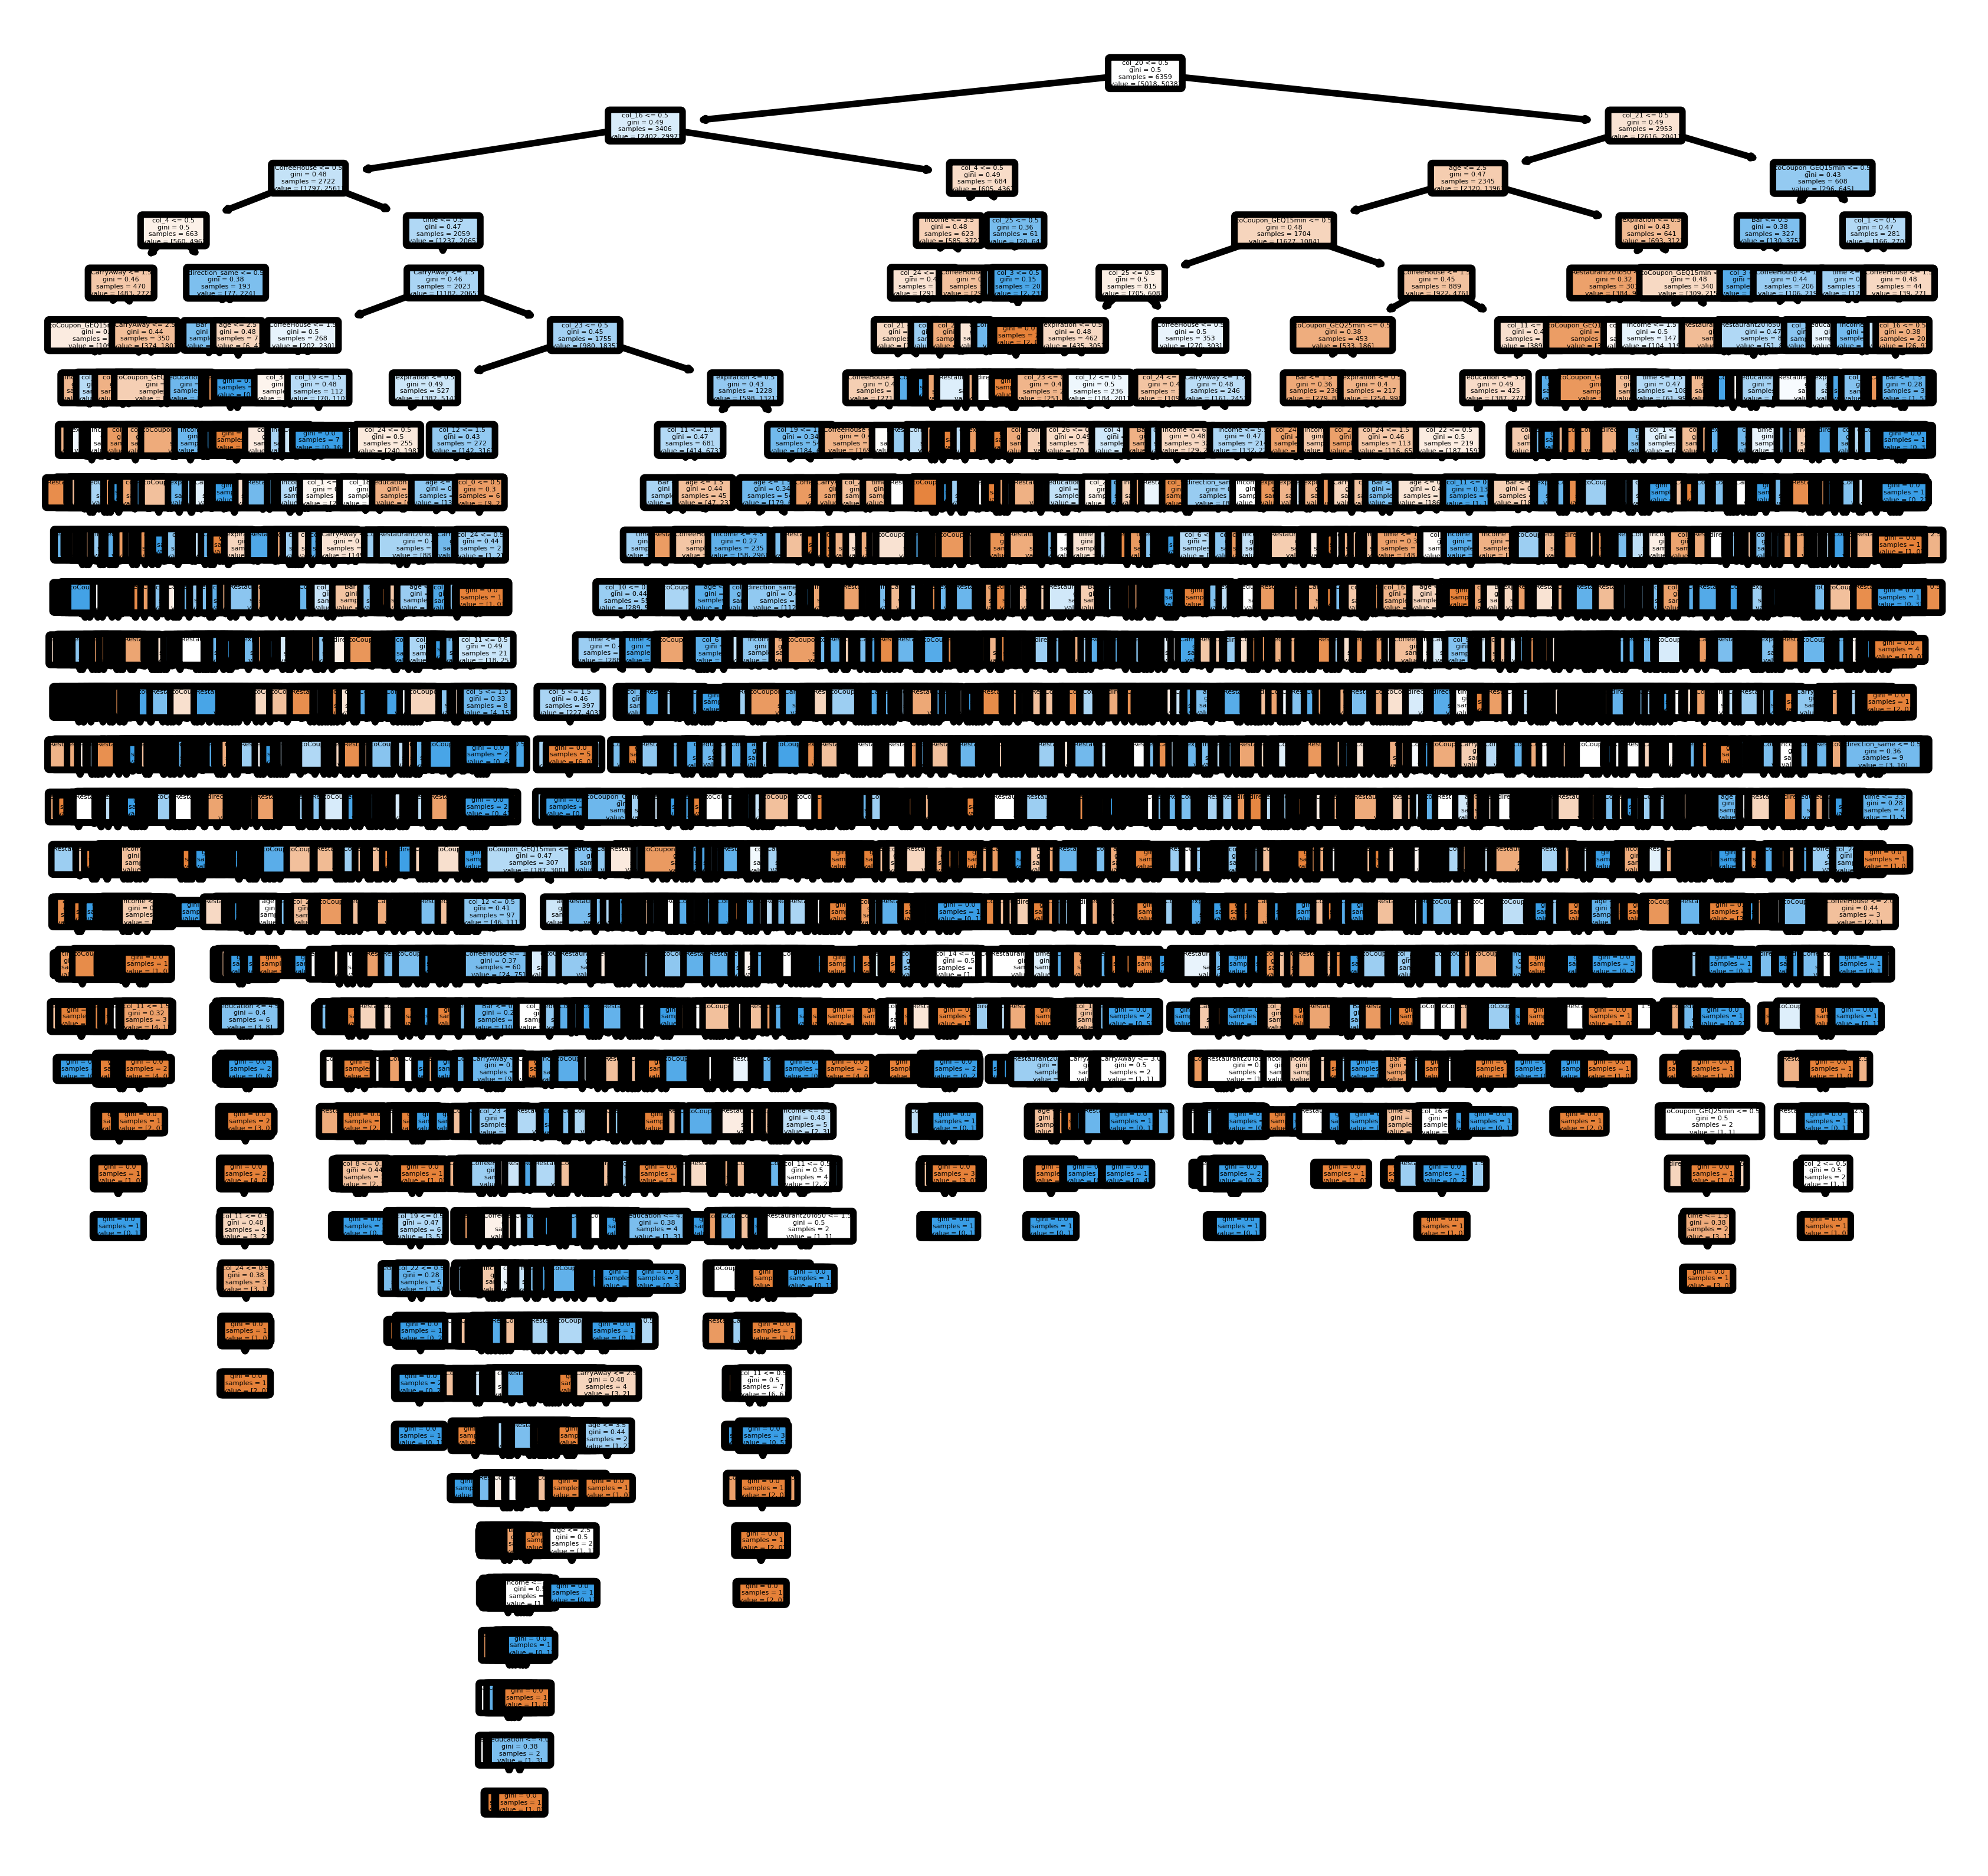

In [110]:
from sklearn.tree import export_graphviz
from sklearn import tree


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=800)
estimator = rf.estimators_[0]
tree.plot_tree(estimator,
                feature_names = list(x_sm_train_hashing.columns),
                rounded=True, proportion=False, precision=2, filled=True)

#fig.savefig('rf_individualtree.png')

**K-Nearest Neighbor**

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier().fit(x_sm_train_hashing, y_sm_train)
eval(knn)

accuracy (test): 0.6468411313772139
precision (test): 0.7013712544438802
recall (test): 0.6486613433536872
roc-auc (train-proba): 0.9005268191049771
roc-auc (test-proba): 0.6954984230551439


**Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(x_sm_train_hashing, y_sm_train)
eval(dt)

accuracy (test): 0.6605868358445678
precision (test): 0.6984499765147957
recall (test): 0.6984499765147957
roc-auc (train-proba): 0.9999990111066176
roc-auc (test-proba): 0.6550202393048606


**CatBoost**

In [72]:
from catboost import CatBoostClassifier

In [74]:
cb = CatBoostClassifier(random_state=42, verbose=False).fit(x_sm_train_hashing, y_sm_train)
eval(cb)

accuracy (test): 0.7449114459423738
precision (test): 0.7586666666666667
recall (test): 0.8017848755284172
roc-auc (train-proba): 0.9440333021317694
roc-auc (test-proba): 0.8193652690461599


**XGBoost**

In [75]:
from xgboost import XGBClassifier

In [76]:
xg = XGBClassifier(random_state=42, use_label_encoder=False).fit(x_sm_train_hashing, y_sm_train)
eval(xg)

accuracy (test): 0.7412106793550093
precision (test): 0.7580789946140036
recall (test): 0.7933302019727572
roc-auc (train-proba): 0.9756452964433381
roc-auc (test-proba): 0.8154219129735449


**AdaBoost**

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
ab = AdaBoostClassifier(random_state=42).fit(x_sm_train_hashing, y_sm_train)
eval(ab)

accuracy (test): 0.675389902194026
precision (test): 0.7175277643650411
recall (test): 0.6979802724283701
roc-auc (train-proba): 0.7717032232861133
roc-auc (test-proba): 0.7276677573418953


# MODEL TUNING HYPERPARAMETER

In [79]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [81]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': plusNone(np.array(range(1,x_sm_train_hashing.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    },
    {# LogisticRegression
        'penalty' : ['l1', 'l2'],
        'C' : [0.0001, 0.001, 0.1, 0.02, 0.03, 0.01],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

In [82]:
models = [DecisionTreeClassifier(random_state=42, class_weight='balanced'),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=42, class_weight='balanced'),
          XGBClassifier(random_state=42, use_label_encoder=False),
          AdaBoostClassifier(random_state=42),
          CatBoostClassifier(random_state=42, verbose = False),
          LogisticRegression(random_state=42, class_weight='balanced')]

names = ['Decision Tree',
         'KNN',
         'Random Forest',
         'XGBoost',
         'AdaBoost',
         'CatBoost',
         'LogisticRegression']

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
def model_score_tune_rscv(model, name, params, n_iter = 10):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = 0, scoring = 'accuracy', random_state = 42, n_iter = n_iter)
    RSCV.fit(x_sm_train_hashing, y_sm_train)
    y_pred = RSCV.predict(x_test_hashing)
    y_pred_proba = RSCV.predict_proba(x_test_hashing)
    y_pred_train = RSCV.predict(x_sm_train_hashing)
    y_pred_train_proba = RSCV.predict_proba(x_sm_train_hashing)

    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
    print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
    print('precision (test): '+ str(precision_score(y_test, y_pred)))
    print('recall (test): '+ str(recall_score(y_test, y_pred)))
    print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
    print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))
    print(RSCV.best_params_)
    print('\n')

In [87]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i])

Decision Tree:
accuracy (test): 0.4372191382500661
precision (test): 0.0
recall (test): 0.0
roc-auc (train-proba): 0.5
roc-auc (test-proba): 0.5
{'min_samples_split': 0.1, 'min_samples_leaf': 0.30000000000000004, 'max_features': 4, 'max_depth': None}


KNN:
accuracy (test): 0.6468411313772139
precision (test): 0.6935090287945339
recall (test): 0.6674495068107092
roc-auc (train-proba): 0.9993038981702466
roc-auc (test-proba): 0.6438819480849194
{'p': 2, 'n_neighbors': 1, 'leaf_size': 11, 'algorithm': 'kd_tree'}


Random Forest:
accuracy (test): 0.7412106793550093
precision (test): 0.7597109304426377
recall (test): 0.7900422733677783
roc-auc (train-proba): 0.9999987737722058
roc-auc (test-proba): 0.8093654564734254
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


XGBoost:
accuracy (test): 0.7451757864128998
precision (test): 0.7606263982102909
recall (test): 0.7984969469234382
roc-auc (train-proba): 0.997

In [96]:
xg = XGBClassifier(tree_method= 'auto', min_child_weight= 6, max_depth= 60, reg_lambda = 0.6000000000000001 , gamma= 0.4, eta= 0.3535353535353536, colsample_bytree= 0.6000000000000001, alpha= 0.6000000000000001, random_state=42, use_label_encoder=False)
xg.fit(x_sm_train_hashing, y_sm_train)
y_pred = xg.predict(x_test_hashing)
y_pred_proba = xg.predict_proba(x_test_hashing)
y_pred_train = xg.predict(x_sm_train_hashing)
y_pred_train_proba = xg.predict_proba(x_sm_train_hashing)

print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
print('precision (test): '+ str(precision_score(y_test, y_pred)))
print('recall (test): '+ str(recall_score(y_test, y_pred)))
print('roc-auc (train-proba): '+str(roc_auc_score(y_sm_train, y_pred_train_proba[:,1])))
print('roc-auc (test-proba): '+str(roc_auc_score(y_test, y_pred_proba[:,1])))

accuracy (test): 0.7451757864128998
precision (test): 0.7606263982102909
recall (test): 0.7984969469234382
roc-auc (train-proba): 0.9977917615213198
roc-auc (test-proba): 0.8180294238088286


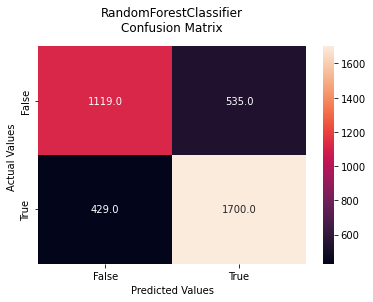

In [97]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt='.1f')

plt.title('RandomForestClassifier\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# FEATURE IMPORTANCES

Text(0.5, 1.0, 'feature importance score')

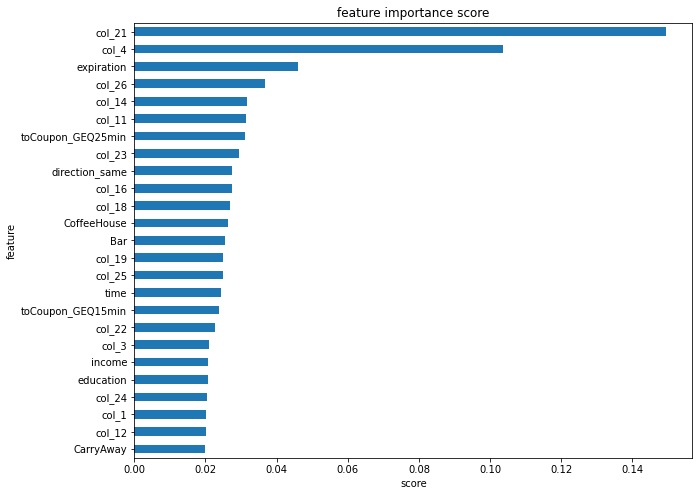

In [98]:
feat_importances = pd.Series(xg.feature_importances_, index=x_sm_train_hashing.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [105]:
feat_importances.nlargest(25)

col_21               0.149372
col_4                0.103593
expiration           0.046006
col_26               0.036618
col_14               0.031772
col_11               0.031478
toCoupon_GEQ25min    0.031150
col_23               0.029331
direction_same       0.027545
col_16               0.027415
col_18               0.026792
CoffeeHouse          0.026276
Bar                  0.025393
col_19               0.025036
col_25               0.024910
time                 0.024477
toCoupon_GEQ15min    0.023736
col_22               0.022772
col_3                0.021069
income               0.020808
education            0.020580
col_24               0.020300
col_1                0.020166
col_12               0.020057
CarryAway            0.020000
dtype: float32

In [106]:
x_fi_train = x_sm_train_hashing[['col_21', 'col_4', 'expiration', 'col_26', 'col_14', 'col_11', 'toCoupon_GEQ25min', 'col_23', 'direction_same', 'col_16', 'col_18', 'CoffeeHouse',
                           'Bar', 'col_19', 'col_25', 'time', 'toCoupon_GEQ15min', 'col_22', 'col_3', 'income', 'education', 'col_24', 'col_1', 'col_12', 'CarryAway']]
x_fi_test = x_test_hashing[['col_21', 'col_4', 'expiration', 'col_26', 'col_14', 'col_11', 'toCoupon_GEQ25min', 'col_23', 'direction_same', 'col_16', 'col_18', 'CoffeeHouse',
                           'Bar', 'col_19', 'col_25', 'time', 'toCoupon_GEQ15min', 'col_22', 'col_3', 'income', 'education', 'col_24', 'col_1', 'col_12', 'CarryAway']]
y_fi_train = y_sm_train
y_fi_test = y_test

In [107]:
print(x_fi_train.shape)
print(x_fi_test.shape)
print(y_fi_train.shape)
print(y_fi_test.shape)

(10056, 25)
(3783, 25)
(10056,)
(3783,)


In [108]:
xg = XGBClassifier(tree_method= 'auto', min_child_weight= 6, max_depth= 60, reg_lambda = 0.6000000000000001 , gamma= 0.4, eta= 0.3535353535353536, colsample_bytree= 0.6000000000000001, alpha= 0.6000000000000001, random_state=42, use_label_encoder=False)
xg.fit(x_fi_train, y_fi_train)
y_pred = xg.predict(x_fi_test)
y_pred_proba = xg.predict_proba(x_fi_test)
y_pred_train = xg.predict(x_fi_train)
y_pred_train_proba = xg.predict_proba(x_fi_train)

print('accuracy (test): '+ str(accuracy_score(y_fi_test, y_pred)))
print('precision (test): '+ str(precision_score(y_fi_test, y_pred)))
print('recall (test): '+ str(recall_score(y_fi_test, y_pred)))
print('roc-auc (train-proba): '+str(roc_auc_score(y_fi_train, y_pred_train_proba[:,1])))
print('roc-auc (test-proba): '+str(roc_auc_score(y_fi_test, y_pred_proba[:,1])))

accuracy (test): 0.7272006344171292
precision (test): 0.7460744728577837
recall (test): 0.7811178957256928
roc-auc (train-proba): 0.9934250456789632
roc-auc (test-proba): 0.8001255762678461


# GITHUB

https://github.com/dikaaka/In-Vehicle-Coupon-Recommendation-Project.git

# PERTANYAAN

1). C. perhitungan metrics yang digunakan untuk dataset ini ialah akurasi. Hal ini dikarenakan data yang dimiliki balanced, lalu tujuan awal membuat model prediksi ini ialah meningkatkan penerimaan kupon, sehingga akurasi model menjadi main metrics. 

1). D. Model terbaik yang dihasilkan dari modeling diatas ialah model XGBoost dengan tingkat keakurasian yang dihasilkan oleh model sebesar 75%, akan tetapi model tersebut belum best-fit karena gap ROC-AUC yang dimiliki sebesar 0.16.


2). A. dikarenakan menggunakan hash encoding, maka fitur teratas di dataset ini merupakan col_21, col_4 hasil dari hash encoding. Di no.3 teratas, terdapat fitur expiration. Fitur ini memiliki kontribusi besar terhadap performa prediksi model XGBoost, berdasarkan EDA pengemudi/pelanggan cenderung menerima kupon jika expiration kupon tersebut 1d/1 hari, dibandingkan 2h/2jam. Adapun rekomendasi bisnis yang dapat diterapkan ialah disarankan ketika membuat campaign kupon, berikan kupon kepada pengemudi/pelanggan yang masa berlakunya minimal 1 hari sebelum hangus, kupon jenis ini lebih banyak diterima oleh pengemudi/pelanggan. Sehingga tingkat penerimaan kupon pun akan tinggi. 

2). B. Setelah dilakukan modeling ulang menggunakan fitur selection, nilai model menurun. Hal ini dilakukan terhadap model XGBoost. Nilai akurasi yang tadinya 74% menurun menjadi 73%